In [1]:
import numpy as np
np.random.seed(1337)

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

In [7]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [9]:
model = Sequential()

model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    units=CELL_SIZE,
    return_sequences=True,
    stateful=True,
))

model.add(TimeDistributed(Dense(OUTPUT_SIZE)))

adam = Adam(LR)
model.compile(optimizer=adam,
             loss='mse')

### training

train cost:  0.02611982
train cost:  0.018766865
train cost:  0.012382012
train cost:  0.011061435
train cost:  0.01449815
train cost:  0.023999859
train cost:  0.02640162
train cost:  0.053912286
train cost:  0.04179818
train cost:  0.03627069
train cost:  0.04349012
train cost:  0.043727342
train cost:  0.023348372
train cost:  0.013053196
train cost:  0.023506735
train cost:  0.008856642
train cost:  0.005831559
train cost:  0.011335565
train cost:  0.012664608
train cost:  0.011348563
train cost:  0.009331833
train cost:  0.006752629
train cost:  0.007824724
train cost:  0.012826089
train cost:  0.012312165
train cost:  0.012075264
train cost:  0.00959094
train cost:  0.0061451253
train cost:  0.011851584
train cost:  0.009084783
train cost:  0.009151847
train cost:  0.009878916
train cost:  0.009757786
train cost:  0.0064105024
train cost:  0.003941369
train cost:  0.0047177644
train cost:  0.0074155126
train cost:  0.013096418
train cost:  0.016435
train cost:  0.01541537
train c

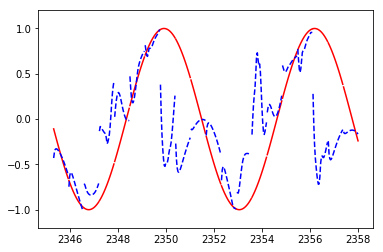

In [18]:
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    if step % 10 == 0:
        print('train cost: ', cost)
    if step > 480:
        plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
        plt.ylim((-1.2, 1.2))
#plt.draw()